In [1]:
import numpy as np
import pandas as pd

### Import dataset from SC-learn

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### Data to work with

In [5]:
data = boston.data

In [6]:
data.shape

(506, 13)

In [7]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## TARGET 
### target -> is the price that need to guess

In [8]:
target = boston.target

### Feature_Names
#### Features names - [ Column names ]

In [9]:
feature_names = boston.feature_names

In [10]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Data_Set Description

In [11]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create DataFrame [ X & Y ]
### data = boston.data
### feature_names = boston.feature_names

DataFrame - X - data about houses in boston

In [12]:
X = pd.DataFrame(data, columns = feature_names)

In [13]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB



### target = boston.target
DataFrame - Y - house prices in boston

In [15]:
Y = pd.DataFrame(target, columns=['price'])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Create DataSets
#### 1.for training        [ X_train, Y_train ]
#### 2.for testing          [ X_test, Y_test ]

In [16]:
from sklearn.model_selection import train_test_split

### Test random values from the first quarter of DataFrame


#### Test_size = first quarter of data to work with, Rand_state = How many times this might repeats

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

# Create Model using Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

### The Main Point is:
### 1. Find best value for W
### 2. Using values of X, calculate values of Y
### 3. Minimize mistake E
### 4. Calculate all this using formula:
### y = w0 + w1 * x1 + w2 * x2 + ... + wm * xm + e

#### 1. Start Train Models with __fit()__ Command

In [20]:
lr.fit(X_train, Y_train)

LinearRegression()

#### 2. Get the Result

In [21]:
y_pred = lr.predict(X_test)

#### Create DataFrame with Columns:
#### Y_test = random data from quantile = 0.25 of Y.values
#### y_pred = result after training model

In [22]:
check_test = pd.DataFrame(
    {
        'y_test': Y_test['price'],
        'y_pred': y_pred.flatten()
    },
    columns = ['y_test', 'y_pred']
)

#### Show 10 rows to compare the results 

In [23]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


## Metrics for assessing the quality of regression models

#### 3. std_error[ e ]

Manual Version To Show How calculations works

In [24]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

#### Add column : error
#### error = y_pred - y_test
##### error - defferent between y_pred and y_test 

In [25]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641


In [26]:
initial_mse = (check_test['error'] ** 2).mean()
initial_mse

22.098694827098083

The rirgt way to calculate result

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
initial_mse = mean_squared_error(Y_test, y_pred)
initial_mse

22.098694827098075

### 4. mean absolute error

Manual Version To Show How calculations works

In [29]:
(np.abs(check_test['error'])).mean()

3.0609395954370355

The rirgt way to calculate result

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mean_absolute_error(Y_test, y_pred)

3.0609395954370346

### R^2 - Result Score
### This score from 0 to 1, above 0.6 is good result

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(Y_test, y_pred)

0.6844267283527119

### Go throw the formula

w0

In [34]:
lr.intercept_

array([29.83642016])

w1 ... wm

In [35]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

## Display results with matplotlib

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0.5, 0, 'column name')

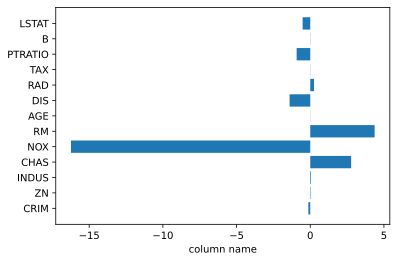

In [37]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('column importance')
plt.xlabel('column name')

In [38]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Using Models above, hard to see result
### But this can be fixed

X_scaled = ( X - X_mean ) / std_x

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [43]:
X_test_scaled = scaler.transform(X_test)

In [44]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [45]:
lr.fit(X_train_scaled, Y_train)

LinearRegression()

Text(0.5, 0, 'column name')

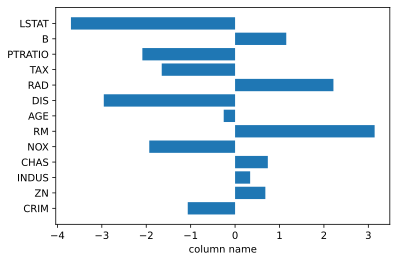

In [46]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('column importance')
plt.xlabel('column name')

### This is better result
1. get rid of the smallest columns: AGE, INDUS

In [47]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

## Create Func. that do all stuff above: train, test using feats, model -> LinearRegression()

In [48]:
def create_model(X_train, Y_train, X_test, Y_test, feats, model):
    model.fit(X_train.loc[:, feats], Y_train)
    y_pred = model.predict(X_test.loc[:, feats])
    mse = mean_squared_error(Y_test, y_pred)
    return mse

In [49]:
create_model(X_train_scaled, Y_train, X_test_scaled, Y_test, feats, LinearRegression())

21.790249416475238

### Check with std_error[ e ]

In [50]:
initial_mse

22.098694827098075

## linear regression models with regularization

In [51]:
from sklearn.linear_model import Lasso, Ridge

# Lasso - linear regression with L1 - regularization

In [52]:
# Alpha responsible for regularization
model = Lasso(alpha = 0.003)

In [53]:
create_model(X_train_scaled, Y_train, X_test_scaled, Y_test, feats, model)

21.81140873202922

# Ridge - lenear regression with L2 - regularization

In [54]:
# Alpha responsible for regularization
model = Ridge(alpha = 0.001)

In [55]:
create_model(X_train_scaled, Y_train, X_test_scaled, Y_test, feats, model)

21.790278352569853